# Response of Cayenne Pepper to Different Water Regimes in Abeokuta
## Growth Characteristics Analysis

by Udechukwu Jerry Chinedu

The growth characteristics of Cayenne pepper can be significantly affected by different water regimes. Cayenne pepper plants require adequate water to grow, but excessive or insufficient water can have negative effects on their growth characteristics. Some of the growth characteristics observed in this study include; plant height, leaf area and number of leaves.

Keys:
* `NL`- number of leaves
* `PH`- plant height
* `LA`- leaf area
* `TRT`- treatment
* `FLD`- flooding (wetting everyday)
* `2DW`- wetting every 2days
* `4DW`- wetting every 4days
* `6DW`- wetting every 6days
* `WAT`- weeks after transplant

In [1]:
# load neccessary labiries

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# import raw data

df = pd.read_csv("Agronomic_parameter.csv")
df.head()

,TRT,Replica,PH1WAT,NL1WAT,LA1WAT,PH2WAT,NL2WAT,LA2WAT,PH3WAT,NL3WAT,...,LA7WAT,PH8WAT,NL8WAT,LA8WAT,PH9WAT,NL9WAT,LA9WAT,PH10WAT,NL10WAT,LA10WAT
0,FLD,1,11.0,9,7.5,18.0,20,8.5,27.0,28,...,26.0,60.0,170,26.00,70.0,198,28.0,75,201,28.0
1,2DW,1,27.0,11,14.0,33.0,27,16.5,38.0,28,...,41.4,60.0,115,42.80,68.0,130,45.0,76,127,45.0
2,4DW,1,11.0,8,7.5,11.0,9,7.5,19.0,18,...,17.5,36.0,86,17.50,45.0,148,18.2,52,161,21.0
3,6DW,1,11.0,11,8.5,13.5,6,8.5,14.0,12,...,10.5,29.0,22,11.20,30.0,48,15.8,30,37,17.5
4,2DW,2,14.5,13,6.8,17.5,15,8.0,24.0,31,...,38.5,51.5,128,41.25,59.0,140,48.0,67,180,56.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TRT      12 non-null     object 
 1   Replica  12 non-null     int64  
 2   PH1WAT   12 non-null     float64
 3   NL1WAT   12 non-null     int64  
 4   LA1WAT   12 non-null     float64
 5   PH2WAT   12 non-null     float64
 6   NL2WAT   12 non-null     int64  
 7   LA2WAT   12 non-null     float64
 8   PH3WAT   12 non-null     float64
 9   NL3WAT   12 non-null     int64  
 10  LA3WAT   12 non-null     float64
 11  PH4WAT   12 non-null     float64
 12  NL4WAT   12 non-null     int64  
 13  LA4WAT   12 non-null     float64
 14  PH5WAT   12 non-null     float64
 15  NL5WAT   12 non-null     int64  
 16  LA5WAT   12 non-null     float64
 17  PH6WAT   12 non-null     float64
 18  NL6WAT   12 non-null     int64  
 19  LA6WAT   12 non-null     float64
 20  PH7WAT   12 non-null     float64
 21  NL7WAT   12 non-nu

In [4]:
df.shape

(12, 32)

In [5]:
df.isnull().sum()

TRT        0
Replica    0
PH1WAT     0
NL1WAT     0
LA1WAT     0
PH2WAT     0
NL2WAT     0
LA2WAT     0
PH3WAT     0
NL3WAT     0
LA3WAT     0
PH4WAT     0
NL4WAT     0
LA4WAT     0
PH5WAT     0
NL5WAT     0
LA5WAT     0
PH6WAT     0
NL6WAT     0
LA6WAT     0
PH7WAT     0
NL7WAT     0
LA7WAT     0
PH8WAT     0
NL8WAT     0
LA8WAT     0
PH9WAT     0
NL9WAT     0
LA9WAT     0
PH10WAT    0
NL10WAT    0
LA10WAT    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['TRT', 'Replica', 'PH1WAT', 'NL1WAT', 'LA1WAT', 'PH2WAT', 'NL2WAT',
       'LA2WAT', 'PH3WAT', 'NL3WAT', 'LA3WAT', 'PH4WAT', 'NL4WAT', 'LA4WAT',
       'PH5WAT', 'NL5WAT', 'LA5WAT', 'PH6WAT', 'NL6WAT', 'LA6WAT', 'PH7WAT',
       'NL7WAT', 'LA7WAT', 'PH8WAT', 'NL8WAT', 'LA8WAT', 'PH9WAT', 'NL9WAT',
       'LA9WAT', 'PH10WAT', 'NL10WAT', 'LA10WAT'],
      dtype='object')

## Effect of Different Water Regimes on the Plant Height

In [8]:
# Filter and subset all weekly data on Plant Height "PH"

ph_columns =[col for col in df.columns if col.startswith("PH")]
ph_df = df[["TRT"] + ph_columns]
ph_df.head()

,TRT,PH1WAT,PH2WAT,PH3WAT,PH4WAT,PH5WAT,PH6WAT,PH7WAT,PH8WAT,PH9WAT,PH10WAT
0,FLD,11.0,18.0,27.0,33.0,39.0,42.5,54.0,60.0,70.0,75
1,2DW,27.0,33.0,38.0,36.0,38.0,42.0,53.0,60.0,68.0,76
2,4DW,11.0,11.0,19.0,21.5,23.5,24.0,23.0,36.0,45.0,52
3,6DW,11.0,13.5,14.0,15.5,17.0,18.5,25.0,29.0,30.0,30
4,2DW,14.5,17.5,24.0,25.5,26.0,34.0,46.0,51.5,59.0,67


In [9]:
ph_df.shape

(12, 11)

In [10]:
# calculate the average plant height per treatment

avg_ph = ph_df.groupby("TRT").mean().round(2)
avg_ph

,PH1WAT,PH2WAT,PH3WAT,PH4WAT,PH5WAT,PH6WAT,PH7WAT,PH8WAT,PH9WAT,PH10WAT
TRT,,,,,,,,,,
2DW,18.00,23.50,29.67,32.33,38.00,43.00,51.50,55.67,63.33,69.33
4DW,11.33,13.67,17.83,20.83,25.50,27.67,30.33,36.17,42.67,47.33
6DW,9.67,11.33,12.50,14.77,18.37,20.33,25.33,30.00,32.83,35.00
FLD,9.67,14.67,21.17,26.83,34.67,36.17,43.67,49.67,56.00,59.33


In [11]:
# Perform stats test for each week after transplant

ph_result = stats.f_oneway(ph_df[ph_df["TRT"]=="FLD"][ph_columns],
                       ph_df[ph_df["TRT"]=="2DW"][ph_columns],
                       ph_df[ph_df["TRT"]=="4DW"][ph_columns],
                       ph_df[ph_df["TRT"]=="6DW"][ph_columns])

# Print the p-value
print("p-value:", ph_result.pvalue)

p-value: [0.10644093 0.06171982 0.01800272 0.01292236 0.0937706  0.04466581
 0.01384008 0.01312355 0.00742643 0.00933797]


In [12]:
avg_ph.describe()

,PH1WAT,PH2WAT,PH3WAT,PH4WAT,PH5WAT,PH6WAT,PH7WAT,PH8WAT,PH9WAT,PH10WAT
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000
mean,12.167500,15.792500,20.292500,23.690000,29.135000,31.79250,37.707500,42.877500,48.707500,52.747500
std,3.966294,5.325551,7.199409,7.577493,8.912966,9.88525,12.019629,11.840702,13.608141,14.861939
min,9.670000,11.330000,12.500000,14.770000,18.370000,20.33000,25.330000,30.000000,32.830000,35.000000
25%,9.670000,13.085000,16.497500,19.315000,23.717500,25.83500,29.080000,34.627500,40.210000,44.247500
50%,10.500000,14.170000,19.500000,23.830000,30.085000,31.92000,37.000000,42.920000,49.335000,53.330000
75%,12.997500,16.877500,23.295000,28.205000,35.502500,37.87750,45.627500,51.170000,57.832500,61.830000
max,18.000000,23.500000,29.670000,32.330000,38.000000,43.00000,51.500000,55.670000,63.330000,69.330000


In [13]:
# transpose the avg_ph

transposed_ph= avg_ph.T
transposed_ph

TRT,2DW,4DW,6DW,FLD
PH1WAT,18.00,11.33,9.67,9.67
PH2WAT,23.50,13.67,11.33,14.67
PH3WAT,29.67,17.83,12.50,21.17
PH4WAT,32.33,20.83,14.77,26.83
PH5WAT,38.00,25.50,18.37,34.67
PH6WAT,43.00,27.67,20.33,36.17
PH7WAT,51.50,30.33,25.33,43.67
PH8WAT,55.67,36.17,30.00,49.67
PH9WAT,63.33,42.67,32.83,56.00
PH10WAT,69.33,47.33,35.00,59.33


([<matplotlib.axis.XTick at 0x1c3d66470d0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

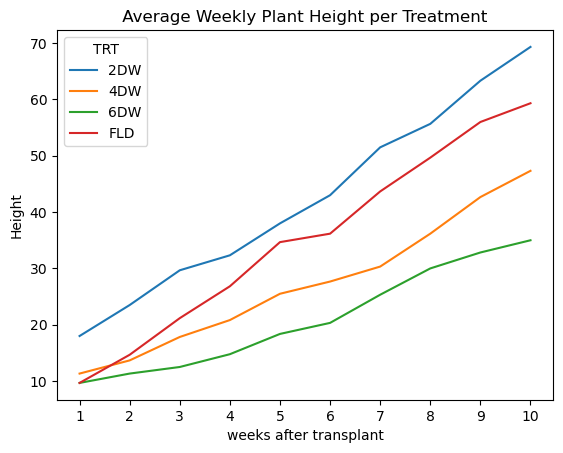

In [14]:
# Create a line chart

transposed_ph.plot(kind="line")
plt.title(" Average Weekly Plant Height per Treatment ")
plt.ylabel("Height")

# set the x_axis category labels
plt.xlabel("weeks after transplant")
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
plt.xticks(range(len(x_labels)), x_labels)

Keys:
* NL- number of leaves
* PH- plant height
* LA- leaf area
* TRT- treatment
* FLD- flooding (wetting everyday)
* 2DW- wetting every 2days
* 4DW- wetting every 4days
* 6DW- wetting every 6days
* WAT- weeks after transplant

It can be observed that the plant height gradually increases from the 1st week till the 10th week after transplant with treatment `2DW` having the highest record, followed by `FLD`. The treatment with the least score was `6DW` with regard to plant height.

## Effect of Different Water Regimes on the Leaf Area

In [15]:
# Filter and subset all weekly data on leaf Area "LA"

la_columns =[col for col in df.columns if col.startswith("LA")]
la_df = df[["TRT"] + la_columns]
la_df.head()

,TRT,LA1WAT,LA2WAT,LA3WAT,LA4WAT,LA5WAT,LA6WAT,LA7WAT,LA8WAT,LA9WAT,LA10WAT
0,FLD,7.5,8.5,20.0,22.5,27.0,28.8,26.0,26.00,28.0,28.0
1,2DW,14.0,16.5,24.0,24.0,31.5,39.6,41.4,42.80,45.0,45.0
2,4DW,7.5,7.5,10.0,10.5,17.5,18.5,17.5,17.50,18.2,21.0
3,6DW,8.5,8.5,9.3,9.9,6.6,9.8,10.5,11.20,15.8,17.5
4,2DW,6.8,8.0,16.5,12.0,19.5,26.0,38.5,41.25,48.0,56.0


In [16]:
# Calculate the average Leaf area per treatment

avg_la = la_df.groupby("TRT").mean().round(2)
avg_la

,LA1WAT,LA2WAT,LA3WAT,LA4WAT,LA5WAT,LA6WAT,LA7WAT,LA8WAT,LA9WAT,LA10WAT
TRT,,,,,,,,,,
2DW,9.43,10.83,20.83,19.33,25.00,31.03,37.47,39.68,43.00,46.17
4DW,4.30,4.60,10.20,11.00,14.00,17.07,16.00,17.23,18.07,21.67
6DW,4.83,5.03,6.90,8.30,8.20,10.30,12.07,12.93,16.37,18.50
FLD,4.80,5.70,15.17,19.87,24.07,29.37,31.33,30.10,32.17,32.33


In [17]:
# Perform stats test on the weekly data

la_result = stats.f_oneway(la_df[la_df["TRT"]=="FLD"][la_columns],
                       la_df[la_df["TRT"]=="2DW"][la_columns],
                       la_df[la_df["TRT"]=="4DW"][la_columns],
                       la_df[la_df["TRT"]=="6DW"][la_columns])

# Print the p-value
print("p-value:", la_result.pvalue)

p-value: [0.23056087 0.16687771 0.02639512 0.03167098 0.00622964 0.00224518
 0.00024756 0.00024055 0.00023716 0.00092981]


The ANOVA result have p-values for each week (LSD= 0.05)
* We can observe that p-values declined week after week which shows the effect of different water regimes on leaf area
* From week 3 to 10 week we can deduced that there is a evidence difference

In [18]:
avg_la.describe()

,LA1WAT,LA2WAT,LA3WAT,LA4WAT,LA5WAT,LA6WAT,LA7WAT,LA8WAT,LA9WAT,LA10WAT
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,5.840000,6.540000,13.275000,14.625000,17.817500,21.942500,24.217500,24.985000,27.402500,29.667500
std,2.405646,2.895594,6.076328,5.853583,8.118942,9.950536,12.128554,12.214326,12.580708,12.491257
min,4.300000,4.600000,6.900000,8.300000,8.200000,10.300000,12.070000,12.930000,16.370000,18.500000
25%,4.675000,4.922500,9.375000,10.325000,12.550000,15.377500,15.017500,16.155000,17.645000,20.877500
50%,4.815000,5.365000,12.685000,15.165000,19.035000,23.220000,23.665000,23.665000,25.120000,27.000000
75%,5.980000,6.982500,16.585000,19.465000,24.302500,29.785000,32.865000,32.495000,34.877500,35.790000
max,9.430000,10.830000,20.830000,19.870000,25.000000,31.030000,37.470000,39.680000,43.000000,46.170000


In [19]:
# Transpose the avg_la 

transpose_la= avg_la.T
transpose_la

TRT,2DW,4DW,6DW,FLD
LA1WAT,9.43,4.30,4.83,4.80
LA2WAT,10.83,4.60,5.03,5.70
LA3WAT,20.83,10.20,6.90,15.17
LA4WAT,19.33,11.00,8.30,19.87
LA5WAT,25.00,14.00,8.20,24.07
LA6WAT,31.03,17.07,10.30,29.37
LA7WAT,37.47,16.00,12.07,31.33
LA8WAT,39.68,17.23,12.93,30.10
LA9WAT,43.00,18.07,16.37,32.17
LA10WAT,46.17,21.67,18.50,32.33


Text(0.5, 0, 'Weeks After Transplannting')

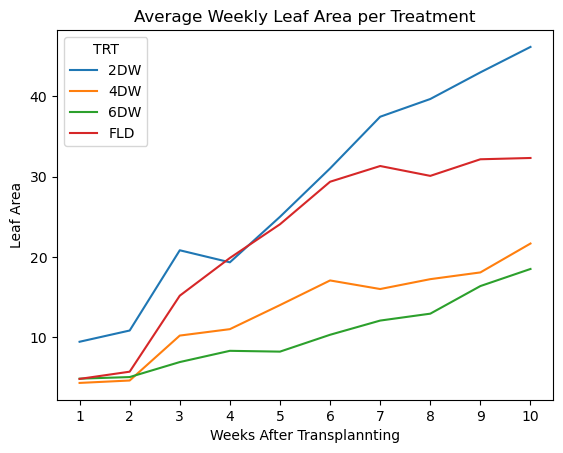

In [20]:
# Create a line chart of the transposed_la 

transpose_la.plot(kind="line")
plt.title("Average Weekly Leaf Area per Treatment")
plt.ylabel("Leaf Area")

# set the x_axis category labels
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
plt.xticks(range(len(x_labels)), x_labels)
plt.xlabel("Weeks After Transplannting")

Keys:
* NL- number of leaves
* PH- plant height
* LA- leaf area
* TRT- treatment
* FLD- flooding (wetting everyday)
* 2DW- wetting every 2days
* 4DW- wetting every 4days
* 6DW- wetting every 6days
* WAT- weeks after transplant

Some of the challenges faced duriing this study was the inability to measure the exact leaf weekly.
This caused skewness in the data. Regardless, we have a clear understanding of the effect on leaf area. 
* It can be deduced that 2DW had the biggest leaf area followed by FLD
* The least were 4DW and 6DW. With 6DW as the lowest as expected

## Effect of Different Water Regimes on the Number of Leaf

In [21]:
# Filter and subset all weekly data on Number of leaves "NL"

nl_columns =[col for col in df.columns if col.startswith("NL")]
nl_df = df[["TRT"] + nl_columns]
nl_df.head()

,TRT,NL1WAT,NL2WAT,NL3WAT,NL4WAT,NL5WAT,NL6WAT,NL7WAT,NL8WAT,NL9WAT,NL10WAT
0,FLD,9,20,28,55,38,98,102,170,198,201
1,2DW,11,27,28,28,55,96,100,115,130,127
2,4DW,8,9,18,27,22,35,42,86,148,161
3,6DW,11,6,12,19,24,42,40,22,48,37
4,2DW,13,15,31,26,72,79,106,128,140,180


In [22]:
avg_nl = nl_df.groupby("TRT").mean().round(2)
avg_nl

,NL1WAT,NL2WAT,NL3WAT,NL4WAT,NL5WAT,NL6WAT,NL7WAT,NL8WAT,NL9WAT,NL10WAT
TRT,,,,,,,,,,
2DW,11.67,21.33,30.33,40.67,75.00,95.00,114.67,136.00,156.00,152.33
4DW,8.33,14.33,18.67,35.00,60.67,80.67,84.33,151.67,174.33,187.00
6DW,9.67,8.33,12.67,17.33,30.00,52.67,63.67,62.67,76.00,76.67
FLD,8.67,17.33,31.00,56.67,109.67,152.33,129.00,203.33,226.00,228.00


In [23]:
# Perform stats test per week 

nl_result = stats.f_oneway(nl_df[nl_df["TRT"]=="FLD"][nl_columns],
                       nl_df[la_df["TRT"]=="2DW"][nl_columns],
                       nl_df[la_df["TRT"]=="4DW"][nl_columns],
                       nl_df[la_df["TRT"]=="6DW"][nl_columns])

# Print the p-value
print("p-value:", nl_result.pvalue)

p-value: [0.14513469 0.14714342 0.24990087 0.19067962 0.32534278 0.15794947
 0.09473167 0.01737266 0.00611095 0.00772602]


In [24]:
avg_nl.describe()

,NL1WAT,NL2WAT,NL3WAT,NL4WAT,NL5WAT,NL6WAT,NL7WAT,NL8WAT,NL9WAT,NL10WAT
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,9.585000,15.330000,23.167500,37.417500,68.835000,95.167500,97.917500,138.417500,158.082500,161.000000
std,1.501854,5.477226,9.001379,16.233602,33.067249,41.967426,29.463421,58.117093,62.232472,64.165717
min,8.330000,8.330000,12.670000,17.330000,30.000000,52.670000,63.670000,62.670000,76.000000,76.670000
25%,8.585000,12.830000,17.170000,30.582500,53.002500,73.670000,79.165000,117.667500,136.000000,133.415000
50%,9.170000,15.830000,24.500000,37.835000,67.835000,87.835000,99.500000,143.835000,165.165000,169.665000
75%,10.170000,18.330000,30.497500,44.670000,83.667500,109.332500,118.252500,164.585000,187.247500,197.250000
max,11.670000,21.330000,31.000000,56.670000,109.670000,152.330000,129.000000,203.330000,226.000000,228.000000


In [25]:
# Transpose nl

transposed_nl = avg_nl.T
transposed_nl

TRT,2DW,4DW,6DW,FLD
NL1WAT,11.67,8.33,9.67,8.67
NL2WAT,21.33,14.33,8.33,17.33
NL3WAT,30.33,18.67,12.67,31.00
NL4WAT,40.67,35.00,17.33,56.67
NL5WAT,75.00,60.67,30.00,109.67
NL6WAT,95.00,80.67,52.67,152.33
NL7WAT,114.67,84.33,63.67,129.00
NL8WAT,136.00,151.67,62.67,203.33
NL9WAT,156.00,174.33,76.00,226.00
NL10WAT,152.33,187.00,76.67,228.00


([<matplotlib.axis.XTick at 0x1c3d6764bb0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

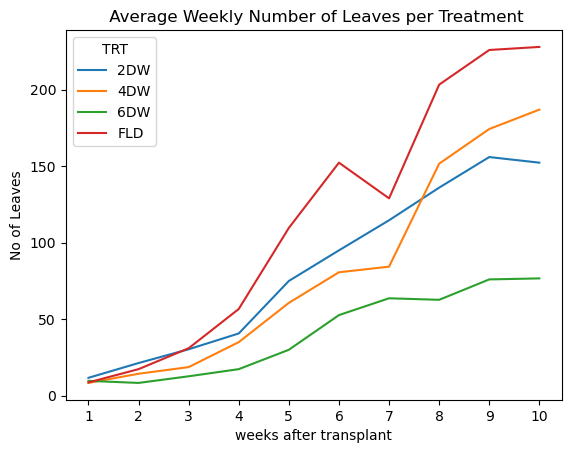

In [26]:
# Create a line chart

transposed_nl.plot(kind="line")
plt.title(" Average Weekly Number of Leaves per Treatment")
plt.ylabel("No of Leaves")
plt.xlabel("weeks after transplant")

# set the x_axis category labels
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
plt.xticks(range(len(x_labels)), x_labels)

Keys:
* NL- number of leaves
* PH- plant height
* LA- leaf area
* TRT- treatment
* FLD- flooding (wetting everyday)
* 2DW- wetting every 2days
* 4DW- wetting every 4days
* 6DW- wetting every 6days
* WAT- weeks after transplant

`FLD` produced the highest number of leaves per treatment. `2DW` produced more leaves than the proceeding treatments but at the `8WAT` treatment `4DW` rose and produced more leaves than `2DW` making it the second treatment with highest number of leaves.